# CX1115 Introduction to DSAI
**Notes from the lecture and videos**

***
***Linear Regression***
1. Select the train data, the first 600 data sets
2. Plot the boxplot, distplot, violinplot
3. Joint point btw two variables 
4. Concatenate the train data with independent variable
5. For linear regression, the library would be sklearn
    > from sklearn.linear_model import LinearRegression
6. The LinearRegression is the class from the model
7. Learns the two parameters
8. Plot the regression line and the training data scatter plot
9. Using the regression line plot the predicted data using the independent variable 


***
***Goodness of Fit***
1. R^2 value
2. MSE 
3. RMSE
4. Test using the Test Data
5. Find the MSE of the Test Data

***
***Random Test-Train Data Split***
1. Importing the modules, the classes
    > from sklearn.linear_model import LinearRegression
    > from sklearn.model_selection import train_test_split
    > from sklearn.metrics import mean_squared_error

#### Importing Libraries and Setting up

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
HouseData = pd.read_csv('train.csv')

In [3]:
HouseData.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### For Reference: Information about the Data

**MSSubClass:** Identifies the type of dwelling involved in the sale.

**MSZoning:** Identifies the general zoning classification of the sale.

**LotFrontage:** Linear feet of street connected to property

**LotArea:** Lot size in square feet

**Street:** Type of road access to property

**Alley:** Type of alley access to property

**LotShape:** General shape of property

**LandContour:** Flatness of the property

**Utilities:** Type of utilities available

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to various conditions

**Condition2:** Proximity to various conditions (if more than one is present)

**BldgType:** Type of dwelling

**HouseStyle:** Style of dwelling

**OverallQual:** Rates the overall material and finish of the house

**OverallCond:** Rates the overall condition of the house

**YearBuilt:** Original construction date

**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

**RoofStyle:** Type of roof

**RoofMatl:** Roof material

**Exterior1st:** Exterior covering on house

**Exterior2nd:** Exterior covering on house (if more than one material)

**MasVnrType:** Masonry veneer type

**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Evaluates the quality of the material on the exterior 

**ExterCond:** Evaluates the present condition of the material on the exterior

**Foundation:** Type of foundation

**BsmtQual:** Evaluates the height of the basement

**BsmtCond:** Evaluates the general condition of the basement

**BsmtExposure:** Refers to walkout or garden level walls

**BsmtFinType1:** Rating of basement finished area

**BsmtFinSF1:** Type 1 finished square feet

**BsmtFinType2:** Rating of basement finished area (if multiple types)

**BsmtFinSF2:** Type 2 finished square feet

**BsmtUnfSF:** Unfinished square feet of basement area

**TotalBsmtSF:** Total square feet of basement area

**Heating:** Type of heating

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**Electrical:** Electrical system

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath:** Basement half bathrooms

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)

**Kitchen:** Kitchens above grade

**KitchenQual:** Kitchen quality

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Functional:** Home functionality (Assume typical unless deductions are warranted)

**Fireplaces:** Number of fireplaces

**FireplaceQu:** Fireplace quality

**GarageType:** Garage location

**GarageYrBlt:** Year garage was built

**GarageFinish:** Interior finish of the garage

**GarageCars:** Size of garage in car capacity

**GarageArea:** Size of garage in square feet

**GarageQual:** Garage quality

**GarageCond:** Garage condition

**PavedDrive:** Paved driveway

**WoodDeckSF:** Wood deck area in square feet

**OpenPorchSF:** Open porch area in square feet

**EnclosedPorch:** Enclosed porch area in square feet

**3SsnPorch:** Three season porch area in square feet

**ScreenPorch:** Screen porch area in square feet

**PoolArea:** Pool area in square feet

**PoolQC:** Pool quality

**Fence:** Fence quality

**MiscFeature:** Miscellaneous feature not covered in other categories

**MiscVal:** $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale


## Problem 1: Predicting SalePrice using GrLivArea (Uni-Variate)
1. Importing the relevant variables: `GrLivArea` and `SalePrice`

In this case, 
Response Variable : **SalePrice**     
Predictor Feature : **GrnLivArea**    

> Regression Model : Total = $a$ $\times$ HP + $b$  

Another thing to be done is to see the correlation, and see the mean, std, min, max etc

In [4]:
HouseNumData = pd.DataFrame(HouseData[['GrLivArea','SalePrice']])

In [5]:
HouseNumData.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


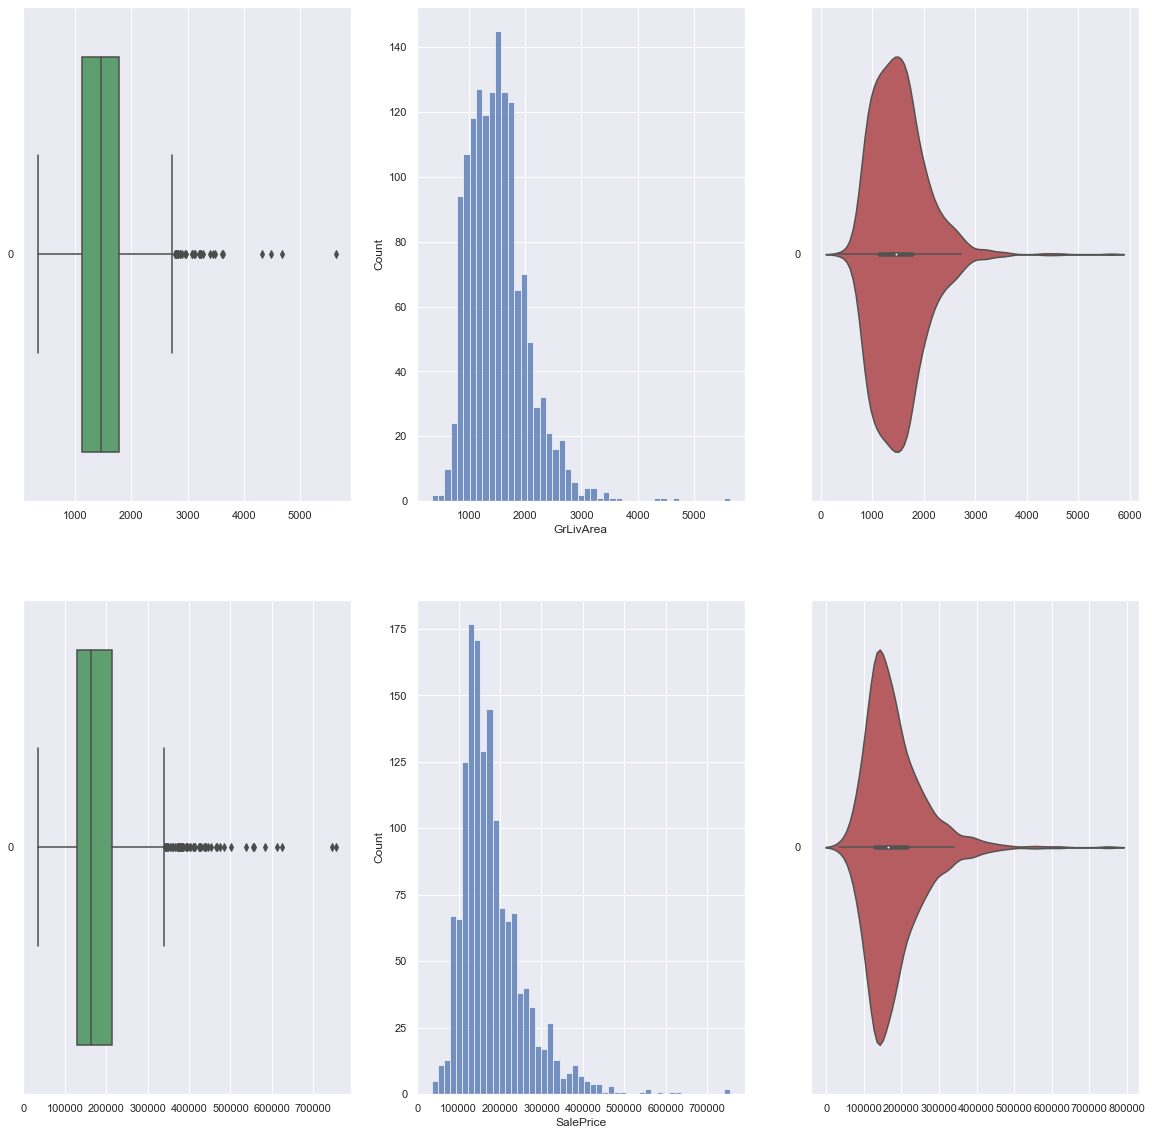

In [6]:
#Get the descriptions and visual representation of the variables 
#Running a for loop 
# For reference 
f, axes = plt.subplots(2, 3, figsize=(20, 20))

count = 0
for var in HouseNumData:
    sb.boxplot(data = HouseNumData[var], orient = "h", ax = axes[count,0], color='g')
    sb.histplot(data = HouseNumData[var], ax = axes[count,1])
    sb.violinplot(data = HouseNumData[var], orient = "h", ax = axes[count,2], color='r')
    count += 1

### a) Plot the SalePrice against GrLivArea using any appropriate bivariate plot to note the strong relationship

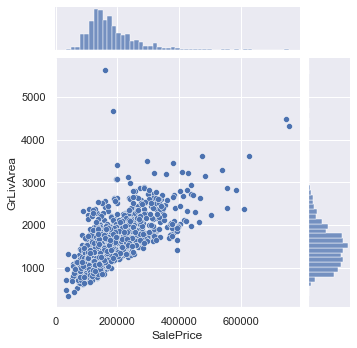

In [7]:
sb.jointplot(data = HouseNumData, x = "SalePrice", y = "GrLivArea", height = 5)

### b) Print the correlation coefficient between the two variables to get a numerical evidence of the relationship

From the below values, we can see that the pearson's correlation value is at 0.708624 which is relatively high. This suggests that the correlation between GrLivArea and SalePrice is relatively strong. 

<AxesSubplot:>

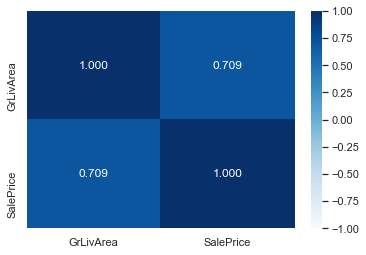

In [8]:
HouseNumData.corr()
sb.heatmap(HouseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f", cmap ="Blues")

### c) Import Linear Regression model from SciKit-Learn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
GLA_SP = LinearRegression()         # create the linear regression object

### Parts d to j

Intercept of Regression 	: b =  [16364.20597799]
Coefficients of Regression 	: a =  [[109.56118344]]
 


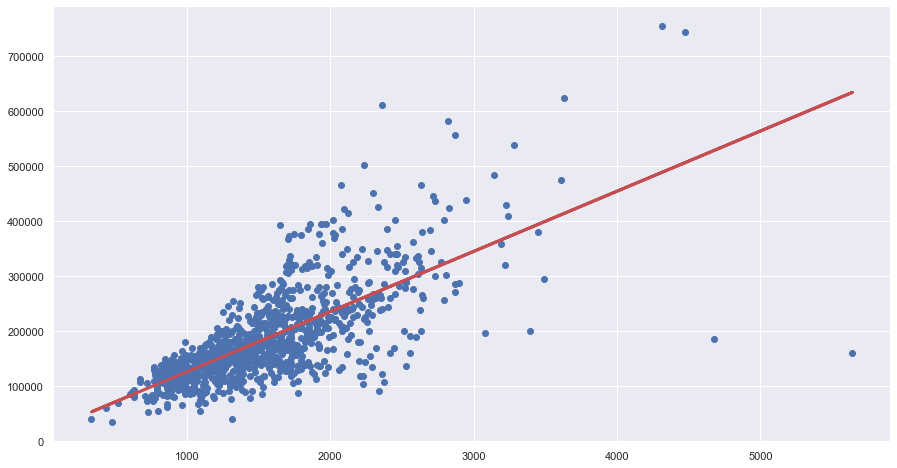

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5151313264871924
Mean Squared Error (MSE) 	: 3311235003.1510572
___________________________________


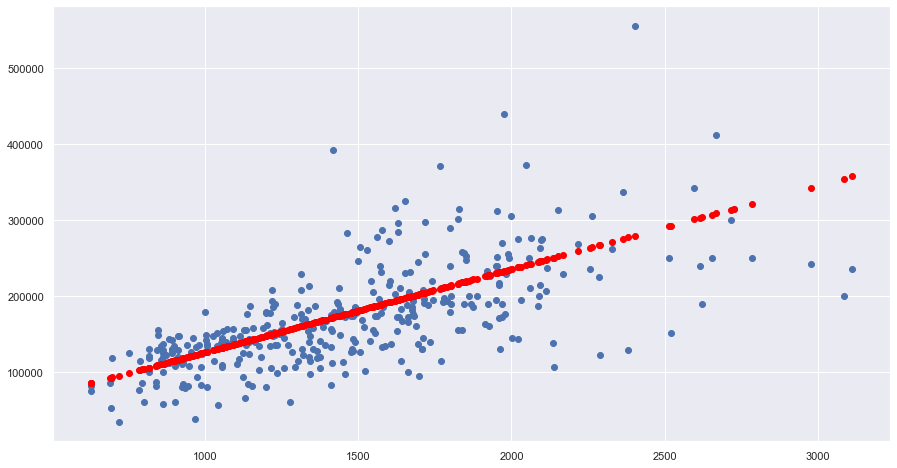

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4248538508246511
Mean Squared Error (MSE) 	: 2631630039.2355313
___________________________________


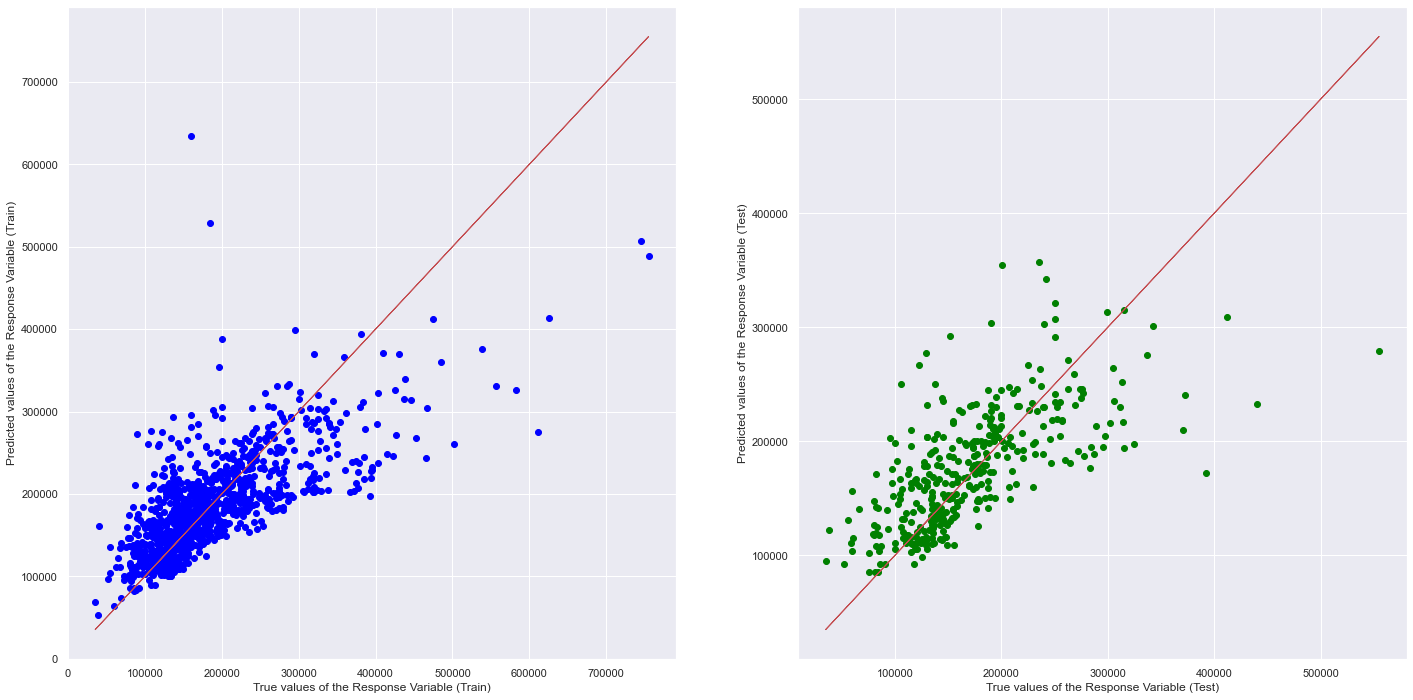

In [10]:
#PART d) split the data into the variables -------------------------------------------------------------------------------------------------
GrLivArea = pd.DataFrame(HouseData['GrLivArea'])
SalePrice = pd.DataFrame(HouseData['SalePrice'])

# Splitting the data randomly 
#GrLivArea simplified to GLA and SalePrice to SP
GLA_train, GLA_test, SP_train, SP_test = train_test_split(GrLivArea, SalePrice, test_size = 360/1460)


#PART e) train the linear regression model using the train GLA and SP--------------------------------------------------------------------------------------------------
GLA_SP.fit(GLA_train, SP_train)       

# PART f) Coefficients of the Linear Regression line-----------------------------------------------------------------------------------------
print('Intercept of Regression \t: b = ', GLA_SP.intercept_)
print('Coefficients of Regression \t: a = ', GLA_SP.coef_)
print(" ")


# PART f) Plot the Linear Regression line----------------------------------------
# Formula for the Regression line
regline_x = GLA_train
regline_y = GLA_SP.intercept_ + GLA_SP.coef_ * GLA_train

# Plot the Linear Regression line---------
f = plt.figure(figsize=(15, 8))
plt.scatter(GLA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



# PART g) Check the Goodness of Fit (on Train Data)---------------------------------------------------------------------------------------------------------------------------------------------
#Use the train data to predict the values of SP
SP_train_pred = GLA_SP.predict(GLA_train) 
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", GLA_SP.score(GLA_train, SP_train)) #Find the R^2 value of btw SP and GLA (train data)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred)) #Find the MSE of the SP train
print("___________________________________")

# PART h) Predict SP values in case of Test Data corresponding to GLA---------------------------------------------------------------------------------------------------------------------------
SP_test_pred = GLA_SP.predict(GLA_test) #use the test data to predict the values of SP


#PART i) Plot the predictions on a Scatterplot of GLA and SP in the test Data-------------------------------------------------------------------------------------------------------------------
f = plt.figure(figsize=(15, 8))
plt.scatter(GLA_test, SP_test)
plt.scatter(GLA_test, SP_test_pred, color = "red") #this is the predictions
#plt.plot(regline_x, regline_y, 'r-', linewidth = 3), uncomment to see the line using regressline from train data
plt.show()

# Part j) Check the Goodness of Fit (on Test Data)--------------------------------------------------------------------------------
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", GLA_SP.score(GLA_test, SP_test)) #Find the R^2 value btw SP and GLA (test dataa)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred)) #Fine the MSE of the SP test
print("___________________________________")


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(SP_train, SP_train_pred, color = "blue") #Plotting scatter plot of SP train (predicted) against SP train (actual)
axes[0].plot(SP_train, SP_train, 'r', linewidth = 1) #Plotting line plot btw SP train (actual) and SP train (Actual) to see the "45-degree" line where actual == predicted
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(SP_test, SP_test_pred, color = "green") #Plotting scatter plot of SP test(predicted) agaianst SP train (actual) 
axes[1].plot(SP_test, SP_test, 'r', linewidth = 1) #Plotting line plot btw SP test (actual) and SP train(predicted)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 2: Predicting Sale Price using other variables
> `Lot Area`

In [11]:
HouseNumData = pd.DataFrame(HouseData[['LotArea','SalePrice']])

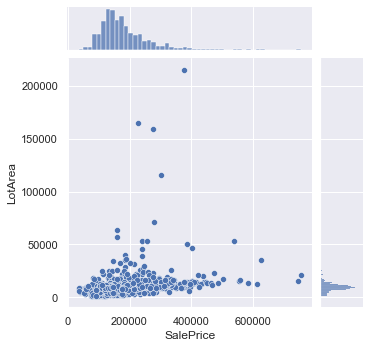

In [12]:
sb.jointplot(data = HouseNumData, x = "SalePrice", y = "LotArea", height = 5)

<AxesSubplot:>

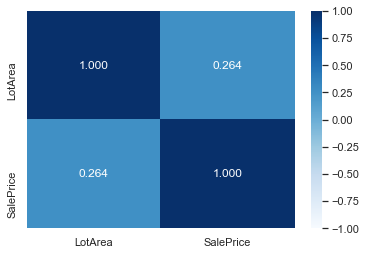

In [13]:
HouseNumData.corr()
sb.heatmap(HouseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f", cmap ="Blues")

Intercept of Regression 	: b =  [156271.46767996]
Coefficients of Regression 	: a =  [[2.33636493]]
 


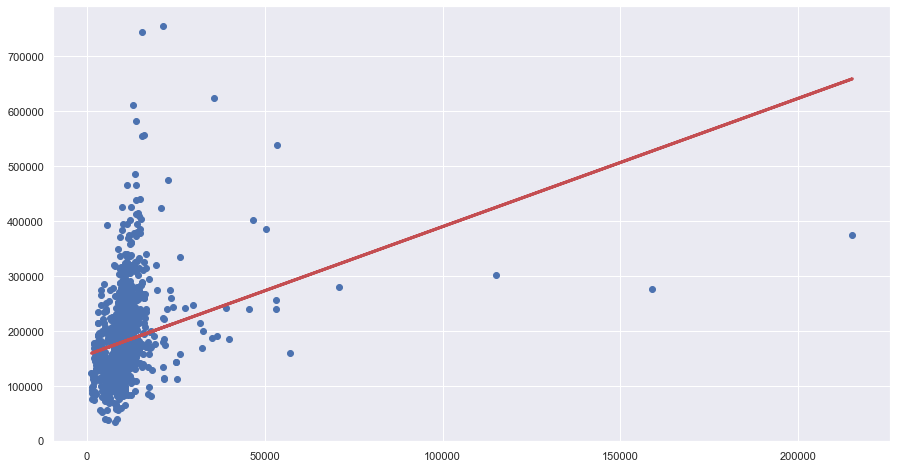

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08431065967650675
Mean Squared Error (MSE) 	: 6062711810.268924
___________________________________


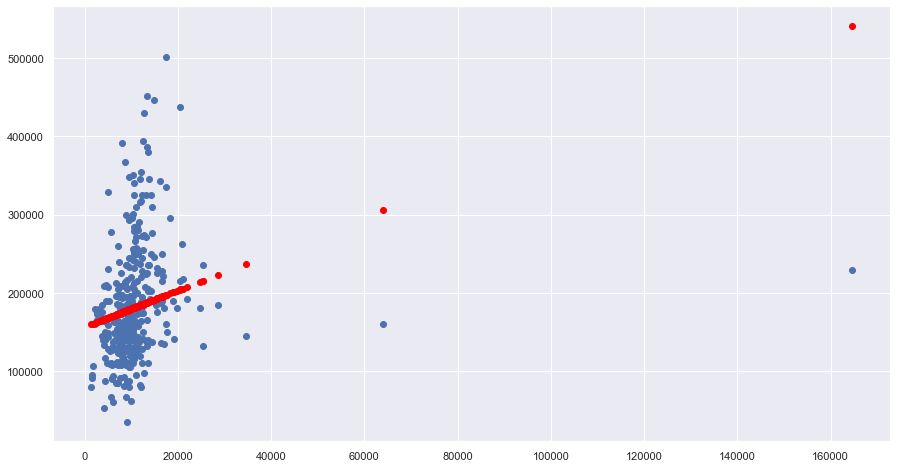

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.009699062247844892
Mean Squared Error (MSE) 	: 5294629814.196902
___________________________________


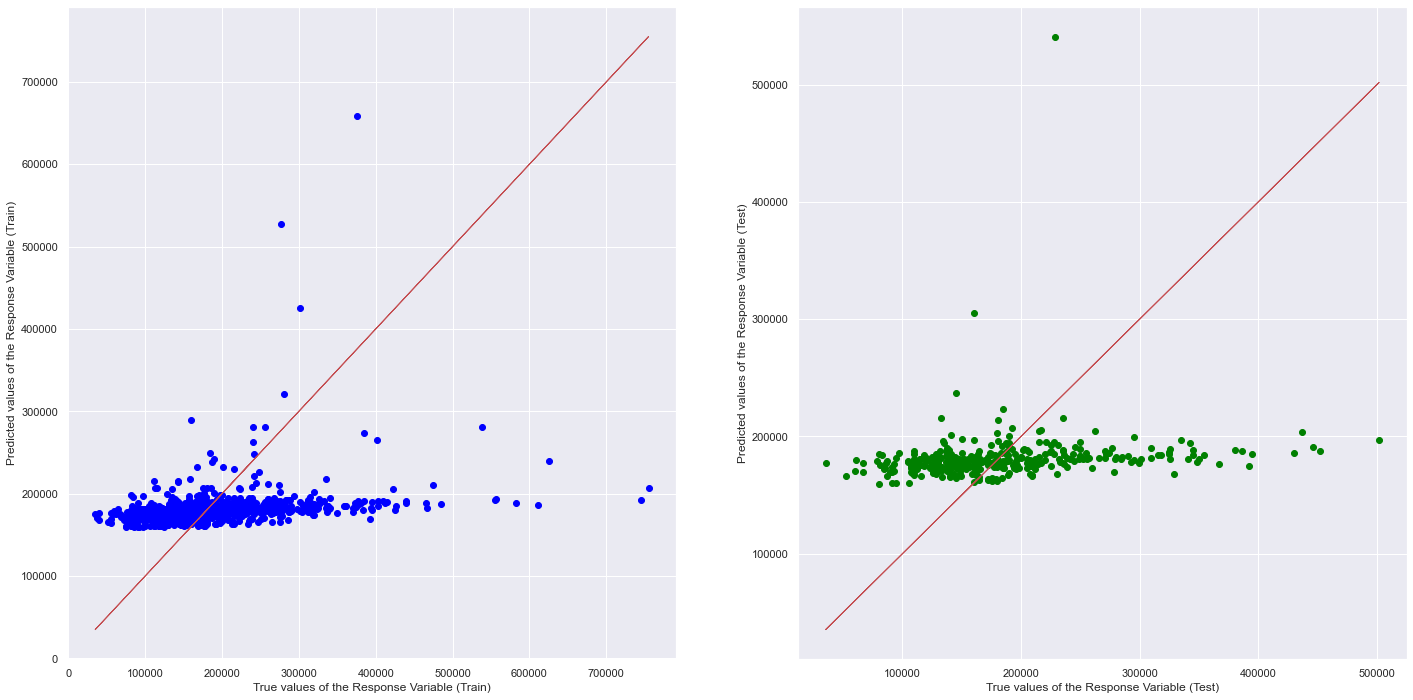

In [14]:
LA_SP = LinearRegression()         # create the linear regression object
#PART d) split the data into the variables -------------------------------------------------------------------------------------------------
LotArea = pd.DataFrame(HouseData['LotArea'])
SalePrice = pd.DataFrame(HouseData['SalePrice'])

# Splitting the data randomly 
#GrLivArea simplified to LA and SalePrice to SP
LA_train, LA_test, SP_train, SP_test = train_test_split(LotArea, SalePrice, test_size = 360/1460)


#PART e) train the linear regression model using the train LA and SP--------------------------------------------------------------------------------------------------
LA_SP.fit(LA_train, SP_train)       

# PART f) Coefficients of the Linear Regression line-----------------------------------------------------------------------------------------
print('Intercept of Regression \t: b = ', LA_SP.intercept_)
print('Coefficients of Regression \t: a = ', LA_SP.coef_)
print(" ")


# PART f) Plot the Linear Regression line----------------------------------------
# Formula for the Regression line
regline_x = LA_train
regline_y = LA_SP.intercept_ + LA_SP.coef_ * LA_train

# Plot the Linear Regression line---------
f = plt.figure(figsize=(15, 8))
plt.scatter(LA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



# PART g) Check the Goodness of Fit (on Train Data)---------------------------------------------------------------------------------------------------------------------------------------------
#Use the train data to predict the values of SP
SP_train_pred = LA_SP.predict(LA_train) 
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", LA_SP.score(LA_train, SP_train)) #Find the R^2 value of btw SP and LA (train data)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred)) #Find the MSE of the SP train
print("___________________________________")

# PART h) Predict SP values in case of Test Data corresponding to LA---------------------------------------------------------------------------------------------------------------------------
SP_test_pred = LA_SP.predict(LA_test) #use the test data to predict the values of SP


#PART i) Plot the predictions on a Scatterplot of LA and SP in the test Data-------------------------------------------------------------------------------------------------------------------
f = plt.figure(figsize=(15, 8))
plt.scatter(LA_test, SP_test)
plt.scatter(LA_test, SP_test_pred, color = "red") #this is the predictions
#plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # using regressline from train data
plt.show()

# Part j) Check the Goodness of Fit (on Test Data)--------------------------------------------------------------------------------
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", LA_SP.score(LA_test, SP_test)) #Find the R^2 value btw SP and LA (test dataa)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred)) #Fine the MSE of the SP test
print("___________________________________")


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(SP_train, SP_train_pred, color = "blue") #Plotting scatter plot of SP train (predicted) against SP train (actual)
axes[0].plot(SP_train, SP_train, 'r', linewidth = 1) #Plotting line plot btw SP train (actual) and SP train (Actual) to see the "45-degree" line where actual == predicted
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(SP_test, SP_test_pred, color = "green") #Plotting scatter plot of SP test(predicted) agaianst SP train (actual) 
axes[1].plot(SP_test, SP_test, 'r', linewidth = 1) #Plotting line plot btw SP test (actual) and SP train(predicted)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 2: Predicting Sale Price using other variables
> `TotalBsmtSF`(TBSF)

In [15]:
HouseNumData = pd.DataFrame(HouseData[['TotalBsmtSF','SalePrice']])

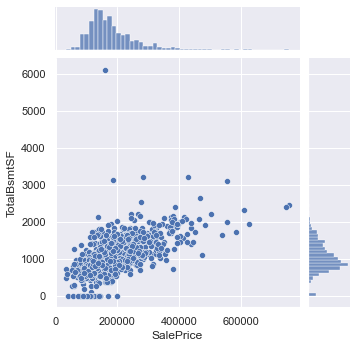

In [16]:
sb.jointplot(data = HouseNumData, x = "SalePrice", y = "TotalBsmtSF", height = 5)

<AxesSubplot:>

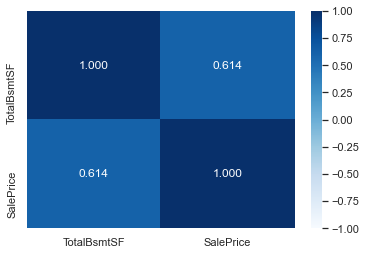

In [17]:
HouseNumData.corr()
sb.heatmap(HouseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f", cmap ="Blues")

Intercept of Regression 	: b =  [66599.68511224]
Coefficients of Regression 	: a =  [[106.95293283]]
 


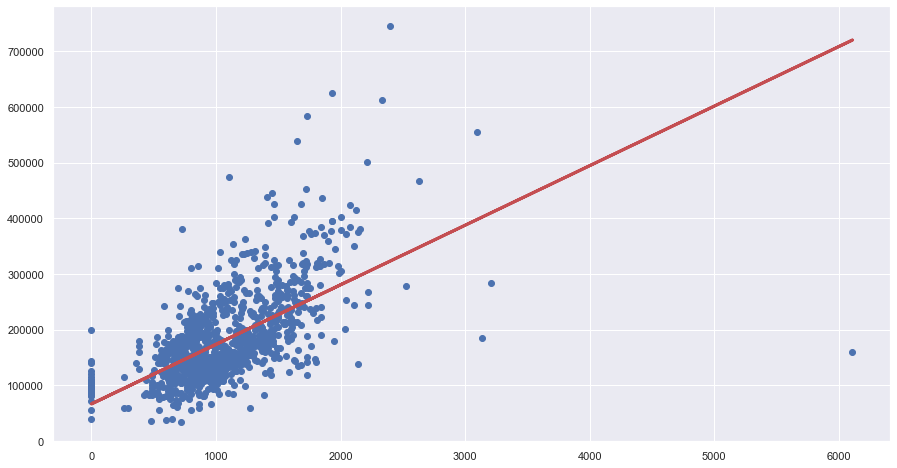

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3602446721385286
Mean Squared Error (MSE) 	: 3967721243.599665
___________________________________


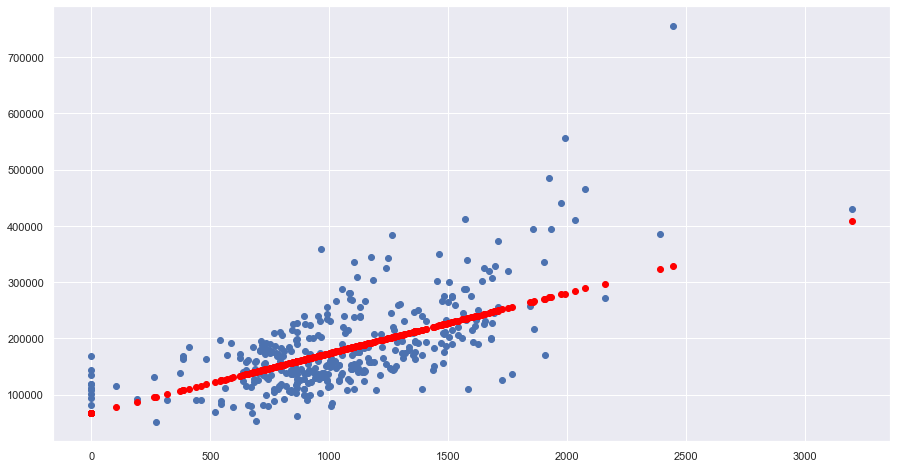

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.41794882884370577
Mean Squared Error (MSE) 	: 3844057762.461459
___________________________________


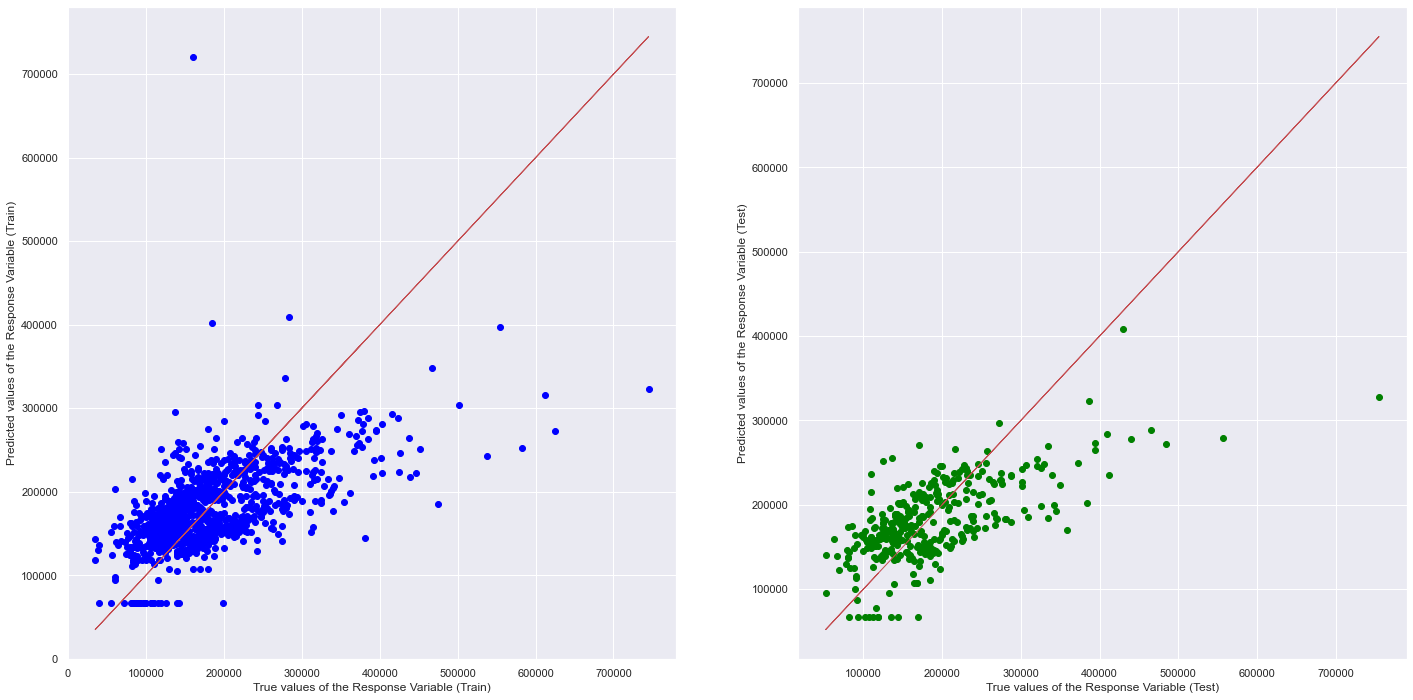

In [18]:
TBSF_SP = LinearRegression()         # create the linear regression object
#PART d) split the data into the variables -------------------------------------------------------------------------------------------------
TotalBsmtSF = pd.DataFrame(HouseData['TotalBsmtSF'])
SalePrice = pd.DataFrame(HouseData['SalePrice'])

# Splitting the data randomly 
#GrLivArea simplified to  TBSF and SalePrice to SP
TBSF_train, TBSF_test, SP_train, SP_test = train_test_split(TotalBsmtSF, SalePrice, test_size = 360/1460)


#PART e) train the linear regression model using the train TBSF and SP--------------------------------------------------------------------------------------------------
TBSF_SP.fit(TBSF_train, SP_train)       

# PART f) Coefficients of the Linear Regression line-----------------------------------------------------------------------------------------
print('Intercept of Regression \t: b = ', TBSF_SP.intercept_)
print('Coefficients of Regression \t: a = ', TBSF_SP.coef_)
print(" ")


# PART f) Plot the Linear Regression line----------------------------------------
# Formula for the Regression line
regline_x = TBSF_train
regline_y = TBSF_SP.intercept_ + TBSF_SP.coef_ * TBSF_train

# Plot the Linear Regression line---------
f = plt.figure(figsize=(15, 8))
plt.scatter(TBSF_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



# PART g) Check the Goodness of Fit (on Train Data)---------------------------------------------------------------------------------------------------------------------------------------------
#Use the train data to predict the values of SP
SP_train_pred = TBSF_SP.predict(TBSF_train) 
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", TBSF_SP.score(TBSF_train, SP_train)) #Find the R^2 value of btw SP and TBSF (train data)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred)) #Find the MSE of the SP train
print("___________________________________")

# PART h) Predict SP values in case of Test Data corresponding to TBSF---------------------------------------------------------------------------------------------------------------------------
SP_test_pred = TBSF_SP.predict(TBSF_test) #use the test data to predict the values of SP


#PART i) Plot the predictions on a Scatterplot of TBSF and SP in the test Data-------------------------------------------------------------------------------------------------------------------
f = plt.figure(figsize=(15, 8))
plt.scatter(TBSF_test, SP_test)
plt.scatter(TBSF_test, SP_test_pred, color = "red") #this is the predictions
#plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # using regressline from train data
plt.show()

# Part j) Check the Goodness of Fit (on Test Data)--------------------------------------------------------------------------------
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", TBSF_SP.score(TBSF_test, SP_test)) #Find the R^2 value btw SP and TBSF (test dataa)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred)) #Fine the MSE of the SP test
print("___________________________________")


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(SP_train, SP_train_pred, color = "blue") #Plotting scatter plot of SP train (predicted) against SP train (actual)
axes[0].plot(SP_train, SP_train, 'r', linewidth = 1) #Plotting line plot btw SP train (actual) and SP train (Actual) to see the "45-degree" line where actual == predicted
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(SP_test, SP_test_pred, color = "green") #Plotting scatter plot of SP test(predicted) agaianst SP train (actual) 
axes[1].plot(SP_test, SP_test, 'r', linewidth = 1) #Plotting line plot btw SP test (actual) and SP train(predicted)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 2: Predicting Sale Price using other variables
> `Garage Area`(GA)

In [19]:
HouseNumData = pd.DataFrame(HouseData[['GarageArea','SalePrice']])

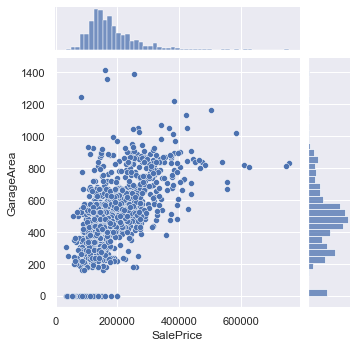

In [20]:
sb.jointplot(data = HouseNumData, x = "SalePrice", y = "GarageArea", height = 5)

<AxesSubplot:>

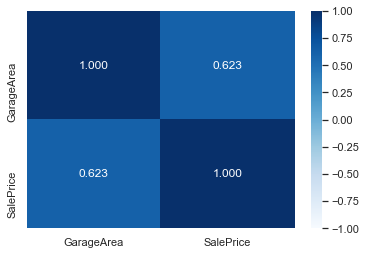

In [21]:
HouseNumData.corr()
sb.heatmap(HouseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f", cmap ="Blues")

Intercept of Regression 	: b =  [74104.03375887]
Coefficients of Regression 	: a =  [[224.68775999]]
 


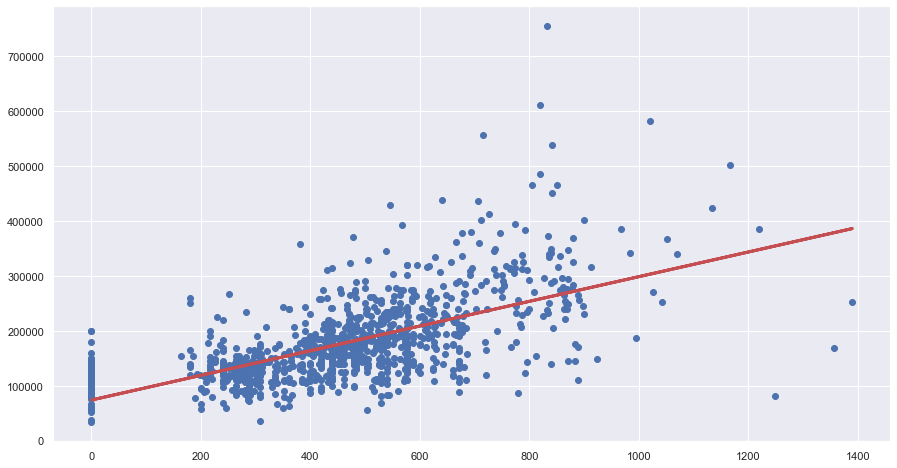

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.386507368240409
Mean Squared Error (MSE) 	: 3525388830.9037457
___________________________________


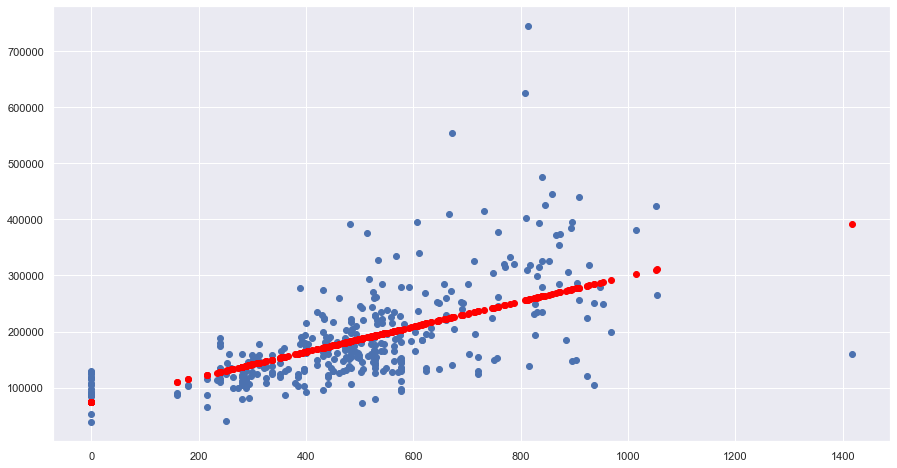

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3862951157058483
Mean Squared Error (MSE) 	: 4874544251.484148
___________________________________


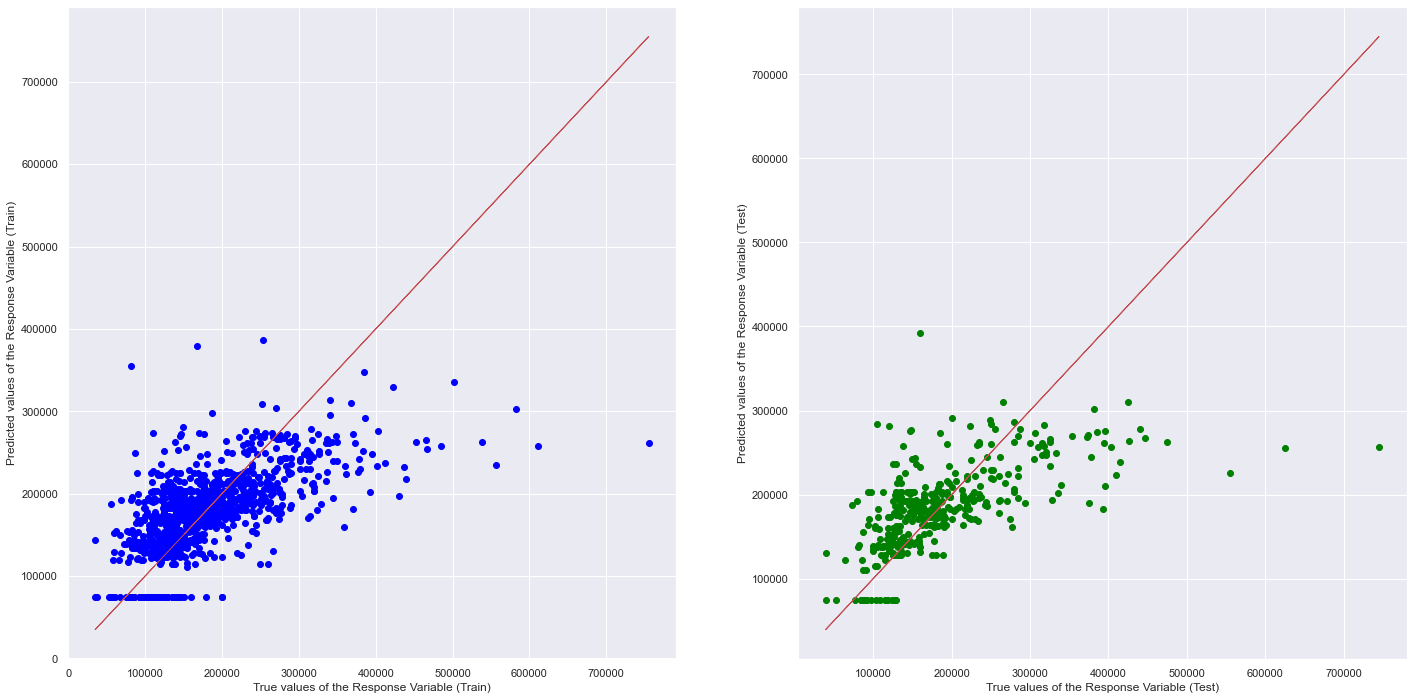

In [22]:
GA_SP = LinearRegression()         # create the linear regression object
#PART d) split the data into the variables -------------------------------------------------------------------------------------------------
GarageArea = pd.DataFrame(HouseData['GarageArea'])
SalePrice = pd.DataFrame(HouseData['SalePrice'])

# Splitting the data randomly 
#GrLivArea simplified to GA and SalePrice to SP
GA_train, GA_test, SP_train, SP_test = train_test_split(GarageArea, SalePrice, test_size = 360/1460)


#PART e) train the linear regression model using the train GA and SP--------------------------------------------------------------------------------------------------
GA_SP.fit(GA_train, SP_train)       

# PART f) Coefficients of the Linear Regression line-----------------------------------------------------------------------------------------
print('Intercept of Regression \t: b = ', GA_SP.intercept_)
print('Coefficients of Regression \t: a = ', GA_SP.coef_)
print(" ")


# PART f) Plot the Linear Regression line----------------------------------------
# Formula for the Regression line
regline_x = GA_train
regline_y = GA_SP.intercept_ + GA_SP.coef_ * GA_train

# Plot the Linear Regression line---------
f = plt.figure(figsize=(15, 8))
plt.scatter(GA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



# PART g) Check the Goodness of Fit (on Train Data)---------------------------------------------------------------------------------------------------------------------------------------------
#Use the train data to predict the values of SP
SP_train_pred = GA_SP.predict(GA_train) 
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", GA_SP.score(GA_train, SP_train)) #Find the R^2 value of btw SP and GA (train data)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred)) #Find the MSE of the SP train
print("___________________________________")

# PART h) Predict SP values in case of Test Data corresponding to GA---------------------------------------------------------------------------------------------------------------------------
SP_test_pred = GA_SP.predict(GA_test) #use the test data to predict the values of SP


#PART i) Plot the predictions on a Scatterplot of GA and SP in the test Data-------------------------------------------------------------------------------------------------------------------
f = plt.figure(figsize=(15, 8))
plt.scatter(GA_test, SP_test)
plt.scatter(GA_test, SP_test_pred, color = "red") #this is the predictions
#plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # using regressline from train data
plt.show()

# Part j) Check the Goodness of Fit (on Test Data)--------------------------------------------------------------------------------
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", GA_SP.score(GA_test, SP_test)) #Find the R^2 value btw SP and GA (test dataa)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred)) #Fine the MSE of the SP test
print("___________________________________")


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(SP_train, SP_train_pred, color = "blue") #Plotting scatter plot of SP train (predicted) against SP train (actual)
axes[0].plot(SP_train, SP_train, 'r', linewidth = 1) #Plotting line plot btw SP train (actual) and SP train (Actual) to see the "45-degree" line where actual == predicted
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(SP_test, SP_test_pred, color = "green") #Plotting scatter plot of SP test(predicted) agaianst SP train (actual) 
axes[1].plot(SP_test, SP_test, 'r', linewidth = 1) #Plotting line plot btw SP test (actual) and SP train(predicted)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 3 : Best Uni-Variate Model to Predict SalePrice
In summary, the best variable to predict Sale Price is GrnLivArea. This is on the basis of the correlation coefficient, R^2, and MSE values. 

### Using the pd.corr(), these are the values that we obtain

> GrnLivArea vs Sale Price: 0.709

> Lot Area vs Sale Price:0.264

> Total BSMT Area vs Sale Price: 0.614

> Garage Area vs Sale Price: 0.623

From these values, it can be seen that the correlation between Ground Living Area and Sale Price is the highest. This suggests that among the four variables, GrnLivArea is the best predictor of SalePrice. 

However, just calculating the correlation may not be enough to suggest that Ground Living Area is the best predictor of SalePrice. Hence we need to compare the R^2 value and MSE.

### Using R^2 values to explain which is a good predictor of SalePrice

By running the jupyter notebook a few times here are some values that were obtained in the format: train, test


> grnliv

0.526, 0.410

0.492, 0.531

**0.537, 0.370**

> lotarea

**0.0578, 0.105**

0.060, 0.089

0.065, 0.078

> Total Bsmt 

0.366,0.407

0.373, 0.383

**0.436, 0.135**

> garage

0.394, 0.361

0.389, 0.386

0.396, 0.363

The ones in bold show a stark difference in the R^2 value between the train and test data in comparison to the other data sets obtained. The reason why there is such a stark difference is that the random allocation could have allocated better fitting data to the train or the test. Therefore, the train ends up being a much better fit than the test data and vice versa. 

### MSE values also need to be compared
Similar to the R^2 value, there were stark differences between MSEs observed as well. For example, TotalBsmt:


***Goodness of Fit of Model Train Dataset***

Explained Variance (R^2) 	: 0.4355555818640078

Mean Squared Error (MSE) 	: 3642752574.4655247

***Goodness of Fit of Model Test Dataset***

Explained Variance (R^2) 	: 0.1346751339460801

Mean Squared Error (MSE) 	: 5068830852.365406

By observing the values, a stark difference in R^2 values tends to result in a stark difference in MSE values. 

**Comparing across variables**

This is in the format: train, test

> GrnLivArea: 3033480288.5415936, 3498254348.1133323

> Lot Area: 5961441501.855777, 5609936760.639713

> Total Bsmt: 3642752574.4655247,  5068830852.365406

> Garage Area: 3923703715.4256325, 3647678793.199566

The lower the MSE the better the correlation. Among all the variables, GrnLivArea has the lowest MSE. Hence suggesting that GrnLivArea is the best Predictor of Sale Price. 

## However...

The Lot area might have the lowest correlation with SalePrice. However, this is because of the outliers that exist in the dataset. Despite having a large lot area, the sale price is low compared to the rest of the data points. These are outliers that affect R^2 values. 

In [31]:
HouseNumData = pd.DataFrame(HouseData[['LotArea','SalePrice']])
filteredData = HouseNumData[HouseNumData['LotArea'] <30000]  

In [32]:
filteredData.head(1460)

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [33]:
filteredData.corr()

,LotArea,SalePrice
LotArea,1.000000,0.397501
SalePrice,0.397501,1.000000


Intercept of Regression 	: b =  [99298.84651294]
Coefficients of Regression 	: a =  [[8.41303269]]
 


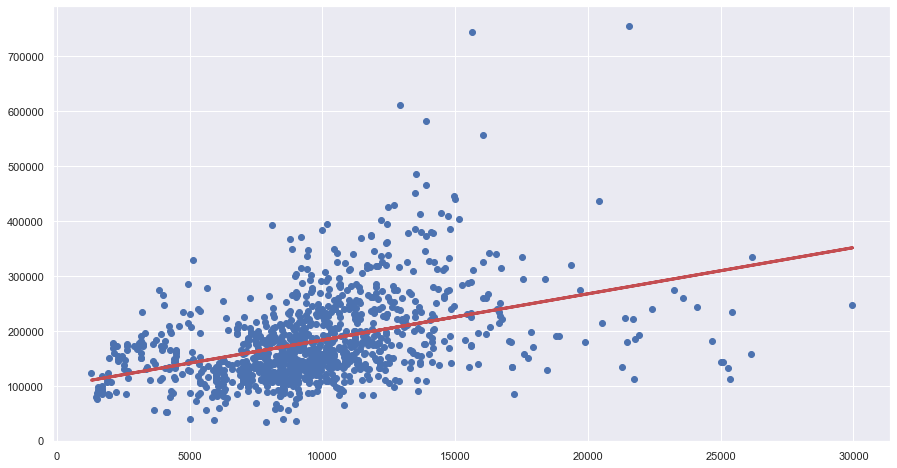

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.16949784968847192
Mean Squared Error (MSE) 	: 5150629619.5519285
___________________________________


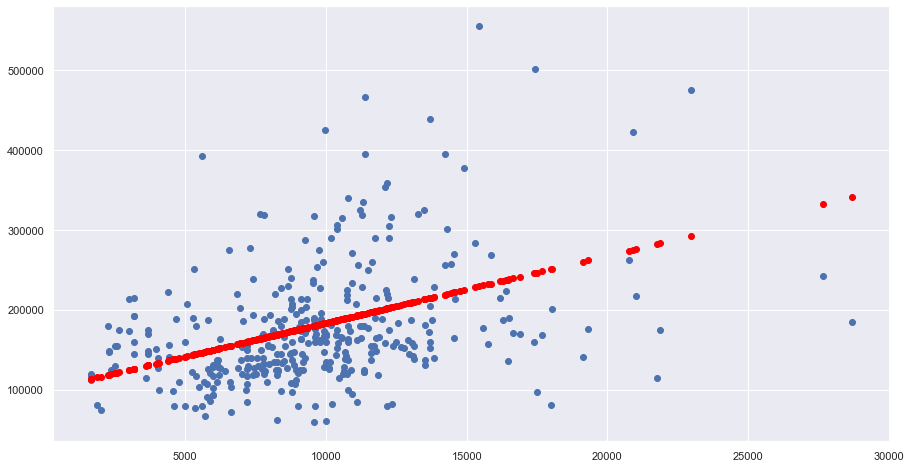

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11426984574296595
Mean Squared Error (MSE) 	: 4932561155.399674
___________________________________


In [34]:
LA_SP = LinearRegression()         # create the linear regression object
#PART d) split the data into the variables -------------------------------------------------------------------------------------------------
LotArea = pd.DataFrame(filteredData['LotArea'])
SalePrice = pd.DataFrame(filteredData['SalePrice'])

# Splitting the data randomly 
#GrLivArea simplified to LA and SalePrice to SP
LA_train, LA_test, SP_train, SP_test = train_test_split(LotArea, SalePrice, test_size = 0.25)


#PART e) train the linear regression model using the train LA and SP--------------------------------------------------------------------------------------------------
LA_SP.fit(LA_train, SP_train)       

# PART f) Coefficients of the Linear Regression line-----------------------------------------------------------------------------------------
print('Intercept of Regression \t: b = ', LA_SP.intercept_)
print('Coefficients of Regression \t: a = ', LA_SP.coef_)
print(" ")


# PART f) Plot the Linear Regression line----------------------------------------
# Formula for the Regression line
regline_x = LA_train
regline_y = LA_SP.intercept_ + LA_SP.coef_ * LA_train

# Plot the Linear Regression line---------
f = plt.figure(figsize=(15, 8))
plt.scatter(LA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



# PART g) Check the Goodness of Fit (on Train Data)---------------------------------------------------------------------------------------------------------------------------------------------
#Use the train data to predict the values of SP
SP_train_pred = LA_SP.predict(LA_train) 
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", LA_SP.score(LA_train, SP_train)) #Find the R^2 value of btw SP and LA (train data)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred)) #Find the MSE of the SP train
print("___________________________________")

# PART h) Predict SP values in case of Test Data corresponding to LA---------------------------------------------------------------------------------------------------------------------------
SP_test_pred = LA_SP.predict(LA_test) #use the test data to predict the values of SP


#PART i) Plot the predictions on a Scatterplot of LA and SP in the test Data-------------------------------------------------------------------------------------------------------------------
f = plt.figure(figsize=(15, 8))
plt.scatter(LA_test, SP_test)
plt.scatter(LA_test, SP_test_pred, color = "red") #this is the predictions
#plt.plot(regline_x, regline_y, 'r-', linewidth = 3) # using regressline from train data
plt.show()

# Part j) Check the Goodness of Fit (on Test Data)--------------------------------------------------------------------------------
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", LA_SP.score(LA_test, SP_test)) #Find the R^2 value btw SP and LA (test dataa)
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred)) #Fine the MSE of the SP test
print("___________________________________")


## Analysis
When we remove lot area where the sizes is more than 30,000, the regression becomes better, it increases from 0.264 to 0.398. 

Hence, while GrnLivArea is the best predictor based on correlation coefficient, R^2 and MSE, it is not taking into account outliers and other variables. 